# Лабораторная работа №1: Первичное исследование данных

## 1. Постановка задачи

### Описание датасета
Набор данных содержит информацию о видеоиграх с сайта Metacritic, включая рейтинги критиков (metascore) и пользователей (userscore), даты выпуска, платформы, жанры, разработчиков и издателей. Данные охватывают игры с 1998 по 2025 год.

### Условный заказчик
Игровые издательства, аналитические компании в игровой индустрии, маркетинговые агентства.

### Возможные задачи ИАД
1. Анализ факторов успеха: Как жанр, платформа, разработчик и год влияют на рейтинги игр.
2. Сегментация и прогнозирование: Кластеризация игр и предсказание пользовательских оценок по мета-оценкам.
3. Репутация студий: Оценка разработчиков и издателей по средним рейтингам их игр в разных жанрах.

## 2. Паспорт датасета

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('../data/metacritic_games.csv')  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 13913 строк, 16 столбцов


,id,title,releaseDate,rating,genres,description,platforms,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,platform_metascores,developer,publisher
0,1300001620,Perfect Dark (2000),2000-05-22,M,FPS,[Xbox Live Arcade] Agent Joanna Dark hit the ...,"Nintendo 64,Xbox 360",97.0,30,Universal acclaim,84,664,Generally favorable,"97,79",Rare Ltd.,"Rare Ltd.,Xbox Game Studios,Nintendo"
1,1300027043,Grand Theft Auto IV,2008-04-29,M,Open-World Action,[Metacritic's 2008 PS3 Game of the Year; Also ...,"PlayStation 3,Xbox 360,PC",98.0,86,Universal acclaim,83,6031,Generally favorable,"98,98,90",Rockstar North,"Rockstar Games,Capcom"
2,1300003547,Tony Hawk's Pro Skater 3,2001-10-30,T,Skating,Challenge up to four friends in online competi...,"Xbox,PlayStation 2,GameCube,PlayStation,PC,Gam...",97.0,34,Universal acclaim,76,712,Generally favorable,"93,97,91,87,90,90",Neversoft Entertainment,"Activision,Success"
3,1300110124,Grand Theft Auto V,2014-11-18,M,Open-World Action,"Los Santos is a vast, sun-soaked metropolis fu...","PlayStation 3,Xbox 360,PlayStation 4,Xbox One,...",97.0,66,Universal acclaim,85,15292,Generally favorable,"97,97,97,97,96,81,79",Rockstar North,"Rockstar Games,Take-Two Interactive"
4,1300001290,The Legend of Zelda: Ocarina of Time,1998-11-23,E,Open-World Action,"As a young boy, Link is tricked by Ganondorf, ...",Nintendo 64,99.0,22,Universal acclaim,91,12158,Universal acclaim,99,Nintendo,"Nintendo,Gradiente"


### Структура данных

In [2]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 13913 entries, 0 to 13912
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13913 non-null  int64  
 1   title                13913 non-null  str    
 2   releaseDate          13884 non-null  str    
 3   rating               11610 non-null  str    
 4   genres               13913 non-null  str    
 5   description          13871 non-null  str    
 6   platforms            13912 non-null  str    
 7   metascore            13912 non-null  float64
 8   metascore_count      13913 non-null  int64  
 9   metascore_sentiment  13912 non-null  str    
 10  userscore            13913 non-null  int64  
 11  userscore_count      13913 non-null  int64  
 12  userscore_sentiment  12440 non-null  str    
 13  platform_metascores  13912 non-null  str    
 14  developer            13904 non-null  str    
 15  publisher            13911 non-null  str    
dt

,id,metascore,metascore_count,userscore,userscore_count
count,1.391300e+04,13912.000000,13913.000000,13913.000000,13913.000000
mean,1.300239e+09,70.580865,25.920506,61.867534,251.236973
std,2.300670e+05,12.281910,20.273256,24.751419,1797.572404
min,1.300000e+09,11.000000,4.000000,0.000000,0.000000
25%,1.300026e+09,64.000000,11.000000,58.000000,10.000000
50%,1.300129e+09,72.000000,19.000000,70.000000,29.000000
75%,1.300480e+09,79.000000,34.000000,78.000000,106.000000
max,1.300713e+09,99.000000,150.000000,100.000000,166719.000000


## 3. Аудит качества данных

### 3.1. Пропуски

In [3]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

missing[missing['Пропуски'] > 0]

,Пропуски,Доля (%)
rating,2303,16.55
userscore_sentiment,1473,10.59
description,42,0.30
releaseDate,29,0.21
developer,9,0.06
publisher,2,0.01
metascore,1,0.01
platforms,1,0.01
platform_metascores,1,0.01
metascore_sentiment,1,0.01


### 3.2. Дубликаты

In [4]:
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

Полных дубликатов строк: 0


### 3.3. Выбросы (пример для одного признака)

Выбросов по методу IQR: 359


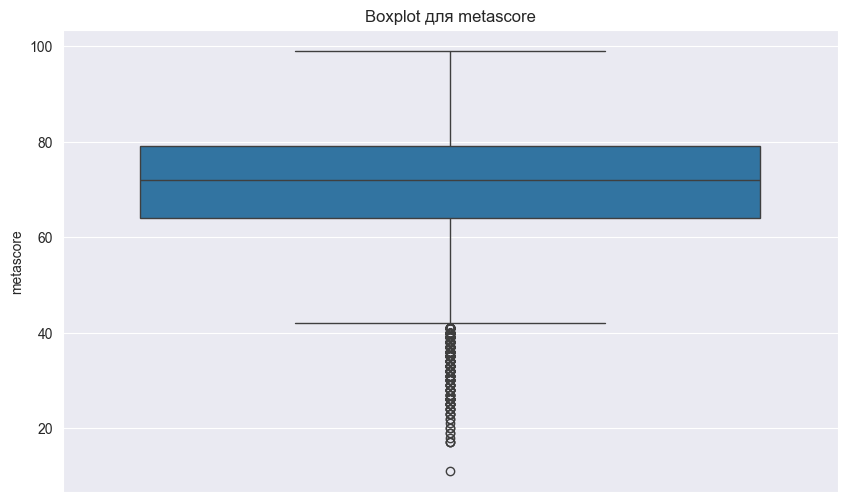

In [5]:
# Замените 'your_numeric_column' на реальное название столбца
column = 'metascore'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()

## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

In [1]:
# Замените на реальный признак
numeric_col = 'userscore'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

### 4.2. Анализ категориального признака

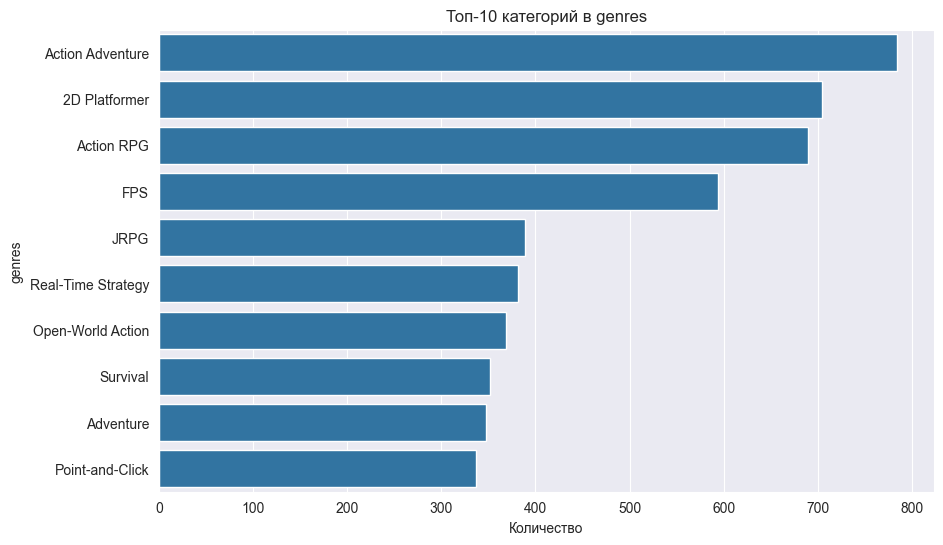

In [9]:
# Замените на реальный категориальный признак
cat_col = 'genres'

plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Топ-10 категорий в {cat_col}')
plt.xlabel('Количество')
plt.show()

## 5. Выводы

Детали в файле `report/quality_report.md`